In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("Country-data.csv")
data = pd.DataFrame(data=data)
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [3]:
count_nan = data.isnull().sum().sum()
count_nan

0

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
data = data.astype({"income":'float64', "gdpp":'float64'})

In [6]:
data = data.drop(columns='country')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    float64
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    float64
dtypes: float64(9)
memory usage: 11.9 KB


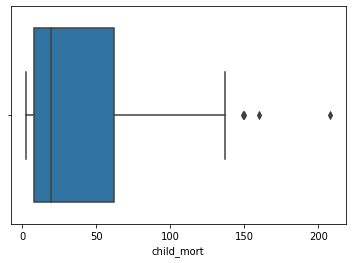

In [8]:
sns.boxplot(x=data['child_mort'])

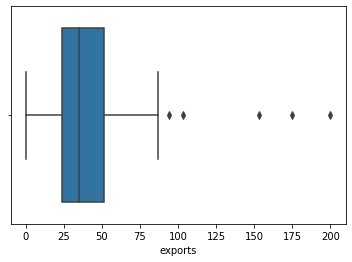

In [9]:
sns.boxplot(x=data['exports'])

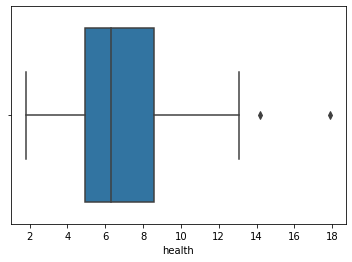

In [10]:
sns.boxplot(x=data['health'])

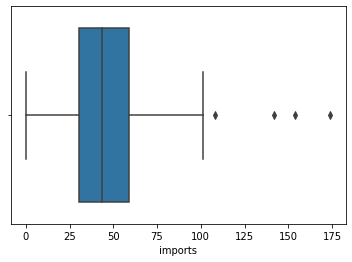

In [11]:
sns.boxplot(x=data['imports'])

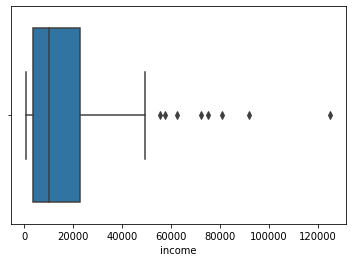

In [12]:
sns.boxplot(x=data['income'])

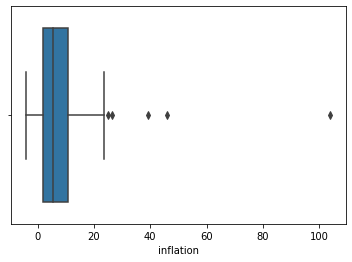

In [13]:
sns.boxplot(x=data['inflation'])

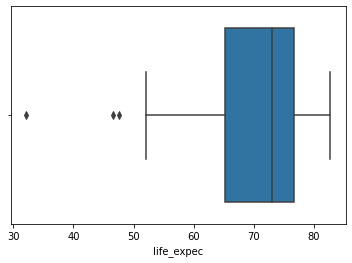

In [14]:
sns.boxplot(x=data['life_expec'])

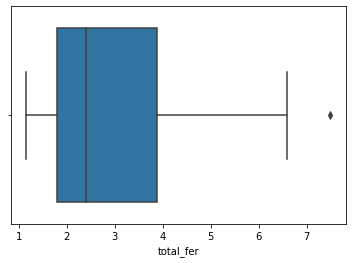

In [15]:
sns.boxplot(x=data['total_fer'])

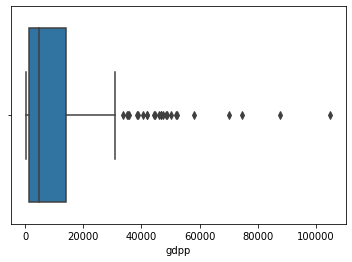

In [16]:
sns.boxplot(x=data['gdpp'])

In [17]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR=Q3-Q1
df=data[~((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).any(axis=1)]

df.shape

(128, 9)

Text(0.5, 1.0, 'Correlation Matrix ')

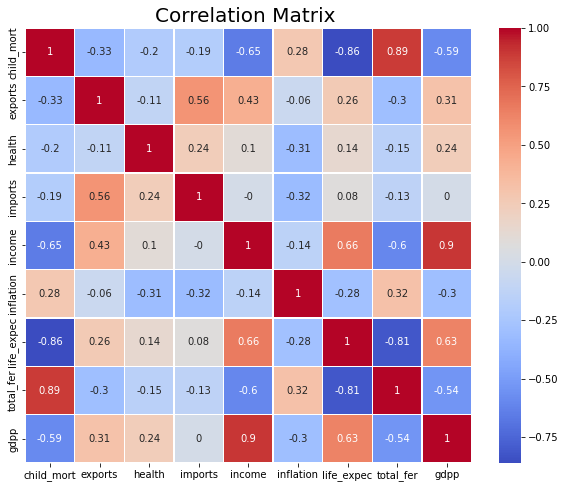

In [18]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix ", size=20)

Based on the correlation matrix above, the highest correlation is between income and gdpp which is 0.9

In [19]:
df.drop(['child_mort','exports', 'health', 'imports', 'inflation', 'life_expec', 'total_fer'], axis=1, inplace=True)
df.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,income,gdpp
0,1610.0,553.0
1,9930.0,4090.0
2,12900.0,4460.0
3,5900.0,3530.0
4,19100.0,12200.0


In [20]:
df = np.array(df)
df

array([[ 1610.,   553.],
       [ 9930.,  4090.],
       [12900.,  4460.],
       [ 5900.,  3530.],
       [19100., 12200.],
       [18700., 10300.],
       [ 6700.,  3220.],
       [16000.,  5840.],
       [22900., 28000.],
       [41100., 20700.],
       [ 2440.,   758.],
       [15300., 16000.],
       [16200.,  6030.],
       [ 7880.,  4340.],
       [ 1820.,   758.],
       [ 6420.,  2180.],
       [ 5410.,  1980.],
       [ 9720.,  4610.],
       [13300.,  6350.],
       [14500., 11200.],
       [15300.,  6840.],
       [ 1430.,   575.],
       [  764.,   231.],
       [ 2520.,   786.],
       [ 2660.,  1310.],
       [ 5830.,  3310.],
       [19400., 12900.],
       [ 9530.,  4560.],
       [10900.,  6250.],
       [ 1410.,   769.],
       [  609.,   334.],
       [ 5190.,  2740.],
       [13000.,  8200.],
       [ 2690.,  1220.],
       [20100., 13500.],
       [33900., 30800.],
       [28300., 19800.],
       [11100.,  5450.],
       [ 9350.,  4660.],
       [ 9860.,  2600.],


Find xmin

In [21]:
xmin = np.amin(df, axis=0)
xmin

array([609., 231.])

Find xmax

In [22]:
xmax = np.amax(df, axis=0)
xmax

array([45400., 30800.])

Scaling data

In [23]:
scaled = np.zeros((128, 2))
for i in range(len(df)):
  scaled[i][0] = (df[i][0] - xmin[0]) / (xmax[0] - xmin[0])
  scaled[i][1] = (df[i][1] - xmin[1]) / (xmax[1] - xmin[1])

scaled

array([[0.02234824, 0.01053355],
       [0.20809984, 0.126239  ],
       [0.27440781, 0.13834277],
       [0.11812641, 0.10791979],
       [0.41282847, 0.39154045],
       [0.4038981 , 0.32938598],
       [0.13598714, 0.0977788 ],
       [0.34361814, 0.18348654],
       [0.49766694, 0.90840394],
       [0.90399857, 0.66959992],
       [0.04087875, 0.01723969],
       [0.32799   , 0.51584939],
       [0.34808332, 0.18970199],
       [0.16233172, 0.13441722],
       [0.02703668, 0.01723969],
       [0.12973588, 0.0637574 ],
       [0.10718671, 0.05721483],
       [0.2034114 , 0.1432497 ],
       [0.28333817, 0.20017011],
       [0.31012927, 0.35882757],
       [0.32799   , 0.21619942],
       [0.01832958, 0.01125323],
       [0.00346052, 0.        ],
       [0.04266482, 0.01815565],
       [0.04579045, 0.0352972 ],
       [0.1165636 , 0.10072295],
       [0.41952624, 0.41443946],
       [0.19916948, 0.14161405],
       [0.22975598, 0.19689882],
       [0.01788306, 0.01759953],
       [0.

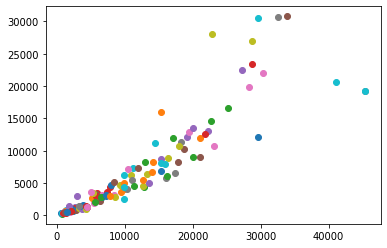

In [24]:
for i in range(len(df)):
  plt.scatter(df[i][0], df[i][1])

plt.show()

Clustering model

In [25]:
colors = ["g","r","b","k"]
class K_Means:
  def __init__(self,k):
    self.k = k
    # self.tol is a toleration value that is according to the sklearn lib
    self.tol = 0.0001
    # self.iter is the amount of iteration that is according to the sklearn lib
    self.max_iter = 300
    # initialize sum square error value for the clustering 
    self.sse = 0
  def fit(self, data):
    #self.centroids used to save the centroids value (dictionary)
    self.centroids = {}
    #random the data sample to get the new centroid
    np.random.shuffle(data)
    for i in range(self.k):
      #fill the centroids as much as self.k value
      self.centroids[i] = data[i]

    for i in range(self.max_iter):
      #self.classifications used to save clustering value (dictionary)
      self.classifications = {}
      #self.current_distances used to save the distances with the centroid (list)
      self.current_distances = []

      for i in range(self.k):
        #make an array as much as self.k
        self.classifications[i] = []

      for featureset in data:
        #distances used to calculate the distances between the data and the centroid
        distances = [np.linalg.norm(featureset-self.centroids[centroid])for centroid in self.centroids]
        #take the index that has the shortest distances from the distances array
        classification = distances.index(min(distances))
        #store it into the self.current_distances array
        self.current_distances.append(distances[classification])
        #store the data into the self.classification array
        self.classifications[classification].append(featureset)

      #prev_centroids contains the old centroid value
      prev_centroids = dict(self.centroids)
      
      for classification in self.classifications:
        #calculate the average of the data to get the new centroid
        self.centroids[classification] = np.average(self.classifications[classification], axis = 0)
      optimized = True
      for c in self.centroids:
        original_centroid = prev_centroids[c]
        current_centroid = self.centroids[c]
        #if the gaps between the new centroid and the old centroid is more than self.tol, then the result of the clustering has not optimal yet
        if np.sum(((current_centroid-original_centroid))/original_centroid*100.0)>self.tol:
          optimized = False
      #if the result of the clustering has been optimal, calculate the sse and quit the looping
      if optimized:
        for se in self.current_distances:
          self.sse = self.sse + (se**2)
        break

In [26]:
#sse is to accomodate the sse value from the k = 1 until k = 10
sse = []
for i in range(1,11):
    clf=K_Means(i)
    clf.fit(df)
    sse.append(clf.sse)

Text(0, 0.5, 'Inertia')

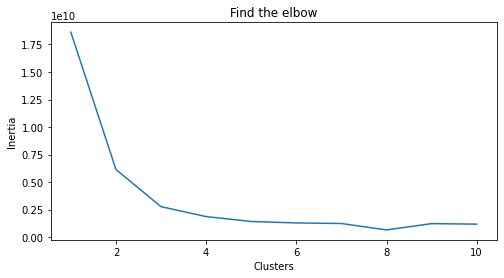

In [27]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=sse, ax=ax)
ax.set_title('Find the elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

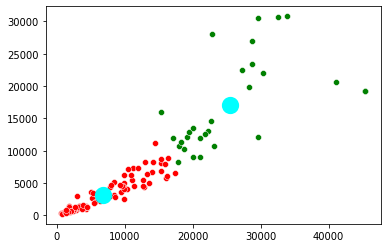

In [28]:
clf = K_Means(2)
clf.fit(df)
#k1 untuk menampung data cluster pertama
k1 = np.reshape(clf.classifications[0], (-1))
#k2 untuk menampung data cluster kedua
k2 = np.reshape(clf.classifications[1], (-1))
#x1 untuk menampung umur dari k1
x1 = []
#y1 untuk menampung kanal_penjualan dari k1
y1 = []
for i in range(len(k1)):
  if (i%2)==0:
    x1.append(k1[i])
  else:
    y1.append(k1[i])
#x2 untuk menampung umur dari k2
x2 = []
#y2 untuk menampung kanal_penjualan daru k2
y2 = []
for i in range(len(k2)):
  if (i%2)==0:
    x2.append(k2[i])
  else:
    y2.append(k2[i])
#tentukan warna
sns.scatterplot(x=x1,y=y1,color=colors[0])
sns.scatterplot(x=x2,y=y2,color=colors[1])
#beri tanda untuk centroid
for centroid in clf.centroids:
  plt.scatter(x=clf.centroids[centroid][0], y=clf.centroids[centroid][1],
              marker="o", color="cyan", s=150, linewidths=5)

plt.show()